In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris['target'])

X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(int)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X,y)

LogisticRegression()

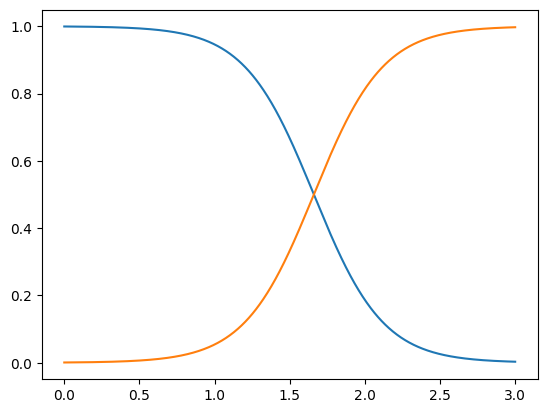

In [23]:
x_new = np.linspace(0,3,1000).reshape(-1,1) # -1自动推断该维度的大小
x_new_pred = log_res.predict_proba(x_new)  # 得到概率
plt.plot(x_new,x_new_pred)
plt.show()

In [ ]:
# softmax 函数
print(1)



1
